In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway



In [2]:
path = "C:\\Users\\Republic Of Gamers\\OneDrive\\Documents\\GitHub\\TSDN-BoyWithLuv\\Source\\Data\\sdm_preprocessed.csv"
df = pd.read_csv(path)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,day_stayed
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55387,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55388,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55389,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55390,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55392 non-null  object 
 1   Age                 55392 non-null  int64  
 2   Gender              55392 non-null  object 
 3   Blood Type          55392 non-null  object 
 4   Medical Condition   55392 non-null  object 
 5   Date of Admission   55392 non-null  object 
 6   Doctor              55392 non-null  object 
 7   Hospital            55392 non-null  object 
 8   Insurance Provider  55392 non-null  object 
 9   Billing Amount      55392 non-null  float64
 10  Room Number         55392 non-null  int64  
 11  Admission Type      55392 non-null  object 
 12  Discharge Date      55392 non-null  object 
 13  Medication          55392 non-null  object 
 14  Test Results        55392 non-null  object 
 15  day_stayed          55392 non-null  int64  
dtypes: f

c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


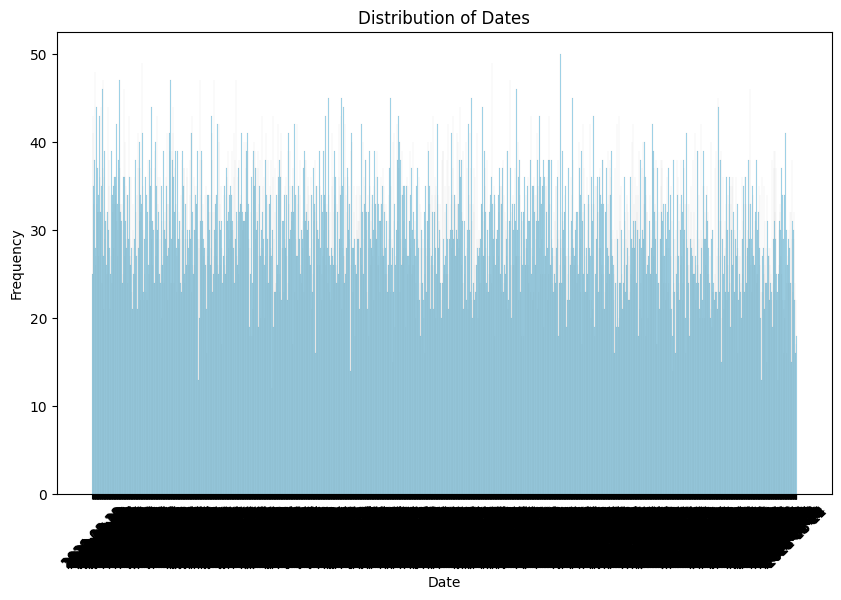

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Date of Admission'], bins=10, kde=False, color='skyblue')
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.show()

In [5]:
df['Date of Admission'].min()

'2019-05-08'

In [6]:
df['Date of Admission'].max()

'2024-05-07'

In [7]:
def tsFeature(df):
    df = df.copy()
    df['month'] = df['Date of Admission'].dt.month
    df['day'] = df['Date of Admission'].dt.day
    df['year'] = df['Date of Admission'].dt.year
    df['quarter'] = df['Date of Admission'].dt.quarter
    df['dayofweek'] = df['Date of Admission'].dt.dayofweek
    df['dayofyear'] = df['Date of Admission'].dt.dayofyear
    return df

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
ts_df = tsFeature(df)

In [8]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55392 non-null  object        
 1   Age                 55392 non-null  int64         
 2   Gender              55392 non-null  object        
 3   Blood Type          55392 non-null  object        
 4   Medical Condition   55392 non-null  object        
 5   Date of Admission   55392 non-null  datetime64[ns]
 6   Doctor              55392 non-null  object        
 7   Hospital            55392 non-null  object        
 8   Insurance Provider  55392 non-null  object        
 9   Billing Amount      55392 non-null  float64       
 10  Room Number         55392 non-null  int64         
 11  Admission Type      55392 non-null  object        
 12  Discharge Date      55392 non-null  object        
 13  Medication          55392 non-null  object    

In [9]:
ts_df['Blood Type Grouped'] = ts_df['Blood Type'].str.replace(r'[+-]', '', regex=True)
ts_df['RhFactor'] = ts_df['Blood Type'].str.extract(r'([+-])')

In [10]:
ts_df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Test Results,day_stayed,month,day,year,quarter,dayofweek,dayofyear,Blood Type Grouped,RhFactor
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,...,Normal,2,1,31,2024,1,2,31,B,-
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,...,Inconclusive,6,8,20,2019,3,1,232,A,+
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,...,Normal,15,9,22,2022,3,3,265,A,-
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,...,Abnormal,30,11,18,2020,4,2,323,O,+
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,...,Abnormal,20,9,19,2022,3,0,262,AB,+


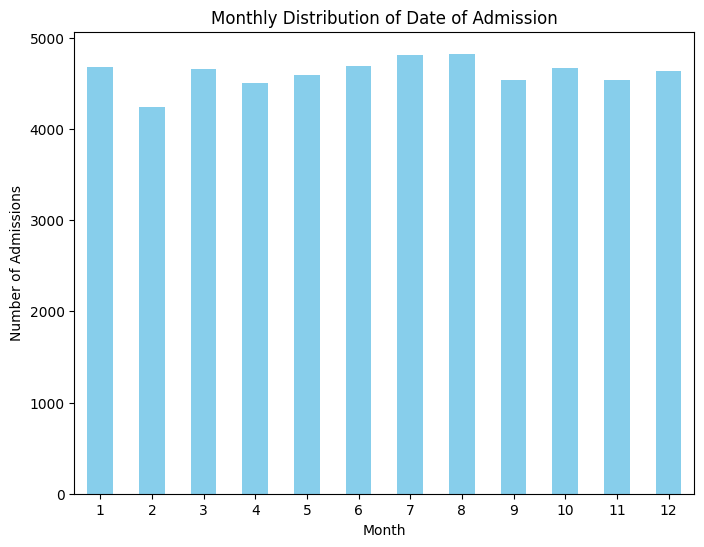

In [11]:
monthlyAdmission = ts_df['month'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
monthlyAdmission.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Date of Admission')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.show()

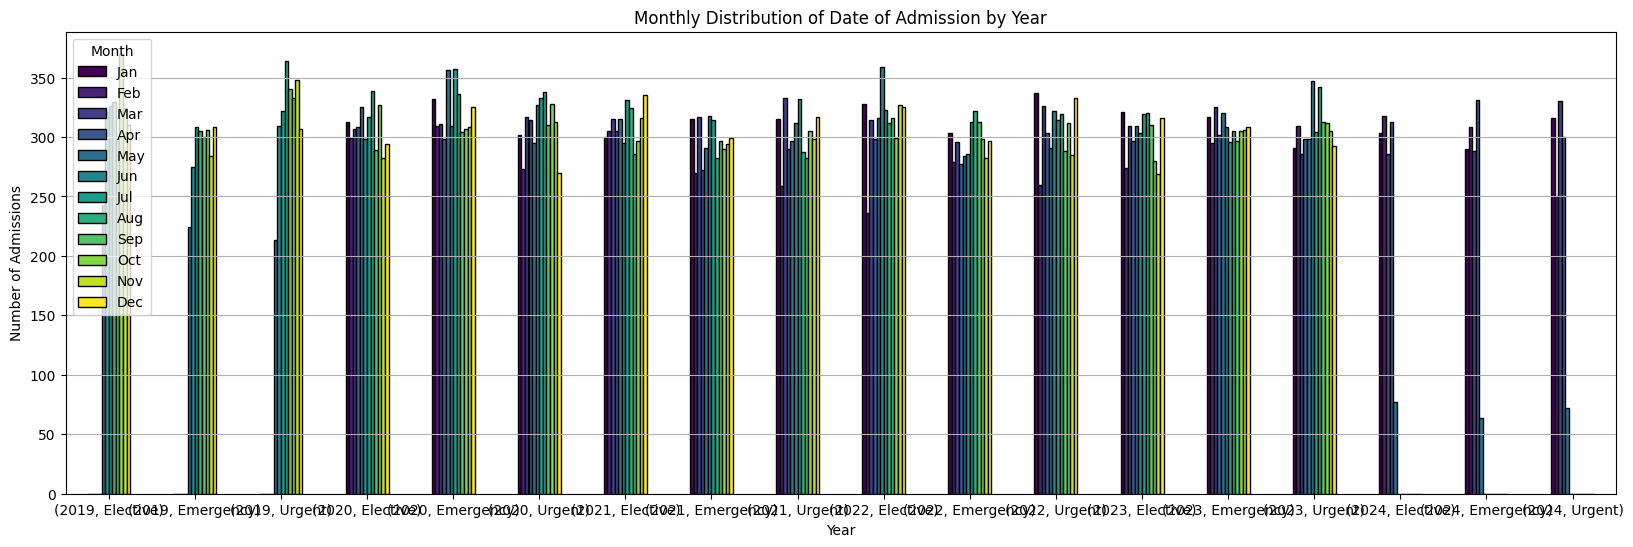

In [12]:
monthlyAdmission = ts_df.groupby(['year', 'Admission Type','month']).size().unstack(fill_value=0)

monthlyAdmission.plot(kind='bar', figsize=(20, 6), colormap='viridis', edgecolor='black')
plt.title('Monthly Distribution of Date of Admission by Year')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)
plt.legend(title='Month', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], loc='upper left')
plt.grid(axis='y')
plt.show()

In [13]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55392 entries, 0 to 55391
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55392 non-null  object        
 1   Age                 55392 non-null  int64         
 2   Gender              55392 non-null  object        
 3   Blood Type          55392 non-null  object        
 4   Medical Condition   55392 non-null  object        
 5   Date of Admission   55392 non-null  datetime64[ns]
 6   Doctor              55392 non-null  object        
 7   Hospital            55392 non-null  object        
 8   Insurance Provider  55392 non-null  object        
 9   Billing Amount      55392 non-null  float64       
 10  Room Number         55392 non-null  int64         
 11  Admission Type      55392 non-null  object        
 12  Discharge Date      55392 non-null  object        
 13  Medication          55392 non-null  object    

In [14]:
ts_df['Date of Admission'] = pd.to_datetime(ts_df['Date of Admission'])
ts_df.set_index('Date of Admission', inplace=True)
monthly_df = ts_df.groupby('Admission Type').resample('M').size().unstack(fill_value=0)
monthly_df = monthly_df.T
monthly_df.index.name = 'Date of Admission'

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_25644\297909929.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = ts_df.groupby('Admission Type').resample('M').size().unstack(fill_value=0)


In [15]:
monthly_df.head()

Admission Type,Elective,Emergency,Urgent
Date of Admission,,,
2019-05-31,243,224,213
2019-06-30,321,275,309
2019-07-31,326,308,322
2019-08-31,329,305,364
2019-09-30,296,300,340


In [ ]:
'''# Create a new DataFrame to hold blood type counts against admission types
blood_type_counts = ts_df.groupby(['Admission Type', 'Blood Type Grouped']).resample('M').size().unstack(fill_value=0)

# Transpose the new DataFrame
blood_type_counts = blood_type_counts.T

# Rename the index to 'Date of Admission'
blood_type_counts.index.name = 'Date of Admission'

# Concatenate the blood type counts to the existing monthly_df
# This assumes monthly_df is already defined
monthly_df = pd.concat([monthly_df, blood_type_counts], axis=1)

# Display the updated DataFrame
print(monthly_df)'''

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_17740\292950620.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  blood_type_counts = ts_df.groupby(['Admission Type', 'Blood Type Grouped']).resample('M').size().unstack(fill_value=0)


                   Elective  Emergency  Urgent  (Elective, A)  (Elective, AB)  \
Date of Admission                                                               
2019-05-31              243        224     213             58              77   
2019-06-30              321        275     309             81              76   
2019-07-31              326        308     322             89              87   
2019-08-31              329        305     364             82              92   
2019-09-30              296        300     340             81              64   
...                     ...        ...     ...            ...             ...   
2024-01-31              303        290     316             68              81   
2024-02-29              318        308     250             79              85   
2024-03-31              286        288     330             63              72   
2024-04-30              313        331     300             82              78   
2024-05-31               77 

In [17]:
# Create a new DataFrame to hold blood type counts against admission types
gender_counts = ts_df.groupby(['Admission Type', 'RhFactor']).resample('M').size().unstack(fill_value=0)

# Transpose the new DataFrame
gender_counts = gender_counts.T

# Rename the index to 'Date of Admission'
gender_counts.index.name = 'Date of Admission'

# Concatenate the blood type counts to the existing monthly_df
# This assumes monthly_df is already defined
monthly_df = pd.concat([monthly_df, gender_counts], axis=1)

# Display the updated DataFrame
monthly_df.head()

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_19800\940187221.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gender_counts = ts_df.groupby(['Admission Type', 'RhFactor']).resample('M').size().unstack(fill_value=0)


,Elective,Emergency,Urgent,"(Elective, +)","(Elective, -)","(Emergency, +)","(Emergency, -)","(Urgent, +)","(Urgent, -)"
Date of Admission,,,,,,,,,
2019-05-31,243,224,213,115,128,111,113,94,119
2019-06-30,321,275,309,163,158,137,138,150,159
2019-07-31,326,308,322,161,165,168,140,144,178
2019-08-31,329,305,364,158,171,147,158,174,190
2019-09-30,296,300,340,147,149,151,149,178,162


In [16]:
# Create a new DataFrame to hold blood type counts against admission types
gender_counts = ts_df.groupby(['Admission Type', 'Gender']).resample('M').size().unstack(fill_value=0)

# Transpose the new DataFrame
gender_counts = gender_counts.T

# Rename the index to 'Date of Admission'
gender_counts.index.name = 'Date of Admission'

# Concatenate the blood type counts to the existing monthly_df
# This assumes monthly_df is already defined
monthly_df = pd.concat([monthly_df, gender_counts], axis=1)

# Display the updated DataFrame
monthly_df.head()

C:\Users\Republic Of Gamers\AppData\Local\Temp\ipykernel_25644\4236170198.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gender_counts = ts_df.groupby(['Admission Type', 'Gender']).resample('M').size().unstack(fill_value=0)


,Elective,Emergency,Urgent,"(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)"
Date of Admission,,,,,,,,,
2019-05-31,243,224,213,121,122,112,112,107,106
2019-06-30,321,275,309,166,155,133,142,149,160
2019-07-31,326,308,322,166,160,175,133,154,168
2019-08-31,329,305,364,156,173,157,148,167,197
2019-09-30,296,300,340,144,152,140,160,173,167


In [19]:
# Columns to test for association with Admission Type
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Medication', 'Test Results','Blood Type Grouped']

# Store results in a dictionary
cramers_v_results = {}

for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(ts_df[column], ts_df['Admission Type'])
    
    # Calculate the chi-squared statistic
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # Total sample size
    r, k = contingency_table.shape  # Number of rows and columns in contingency table
    cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    # Store result
    cramers_v_results[column] = cramers_v

# Display results
for column, cramers_v in cramers_v_results.items():
    print(f"Cramér's V for Admission Type and {column}: {cramers_v:.3f}")

Cramér's V for Admission Type and Gender: 0.013
Cramér's V for Admission Type and Blood Type: 0.011
Cramér's V for Admission Type and Medical Condition: 0.013
Cramér's V for Admission Type and Doctor: 0.900
Cramér's V for Admission Type and Hospital: 0.895
Cramér's V for Admission Type and Insurance Provider: 0.013
Cramér's V for Admission Type and Medication: 0.007
Cramér's V for Admission Type and Test Results: 0.004
Cramér's V for Admission Type and Blood Type Grouped: 0.007


c:\Users\Republic Of Gamers\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


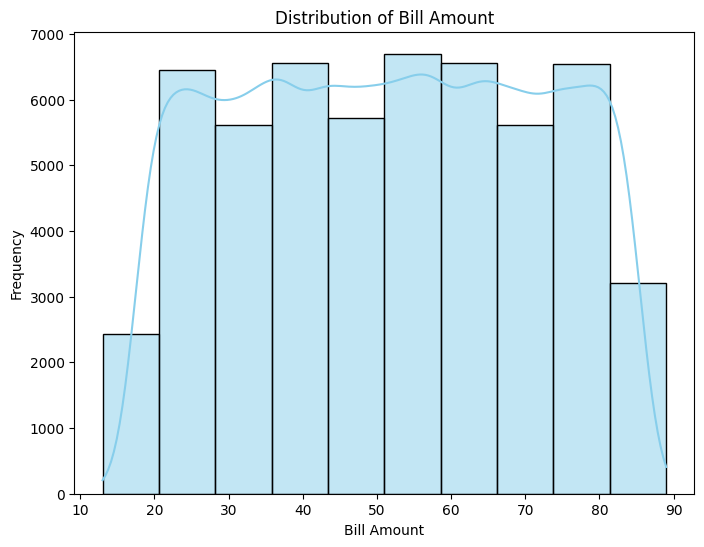

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(ts_df['Age'], kde = True, bins = 10, color = 'skyblue')
plt.title('Distribution of Bill Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Frequency')
plt.show()

In [21]:

groups = [group['Age'].values for name, group in df.groupby('Admission Type')]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

ANOVA F-statistic: 0.5640684173230632, p-value: 0.568893135815157


In [22]:
ts_df['Insurance Provider'].nunique()

5

In [17]:
monthly_df.head()

,Elective,Emergency,Urgent,"(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)"
Date of Admission,,,,,,,,,
2019-05-31,243,224,213,121,122,112,112,107,106
2019-06-30,321,275,309,166,155,133,142,149,160
2019-07-31,326,308,322,166,160,175,133,154,168
2019-08-31,329,305,364,156,173,157,148,167,197
2019-09-30,296,300,340,144,152,140,160,173,167


In [18]:
monthly_df_copy = monthly_df.copy()

In [24]:
for admission_type in monthly_df.columns:
    for lag in range(1, 4):
        monthly_df[f'{admission_type}_Lag_{lag}'] = monthly_df[admission_type].shift(lag)

In [19]:
target_columns = ['Elective', 'Urgent', 'Emergency']

# Loop through only the specified columns
for admission_type in target_columns:
    if admission_type in monthly_df_copy.columns:
        for lag in range(1, 4):
            monthly_df_copy[f'{admission_type}_Lag_{lag}'] = monthly_df_copy[admission_type].shift(lag)


In [20]:
monthly_df_copy.head()

,Elective,Emergency,Urgent,"(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)",Elective_Lag_1,Elective_Lag_2,Elective_Lag_3,Urgent_Lag_1,Urgent_Lag_2,Urgent_Lag_3,Emergency_Lag_1,Emergency_Lag_2,Emergency_Lag_3
Date of Admission,,,,,,,,,,,,,,,,,,
2019-05-31,243,224,213,121,122,112,112,107,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-30,321,275,309,166,155,133,142,149,160,243.0,NaN,NaN,213.0,NaN,NaN,224.0,NaN,NaN
2019-07-31,326,308,322,166,160,175,133,154,168,321.0,243.0,NaN,309.0,213.0,NaN,275.0,224.0,NaN
2019-08-31,329,305,364,156,173,157,148,167,197,326.0,321.0,243.0,322.0,309.0,213.0,308.0,275.0,224.0
2019-09-30,296,300,340,144,152,140,160,173,167,329.0,326.0,321.0,364.0,322.0,309.0,305.0,308.0,275.0


In [27]:
monthly_df.head()

,Elective,Emergency,Urgent,"(Elective, +)","(Elective, -)","(Emergency, +)","(Emergency, -)","(Urgent, +)","(Urgent, -)","(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)"
Date of Admission,,,,,,,,,,,,,,,
2019-05-31,243,224,213,115,128,111,113,94,119,121,122,112,112,107,106
2019-06-30,321,275,309,163,158,137,138,150,159,166,155,133,142,149,160
2019-07-31,326,308,322,161,165,168,140,144,178,166,160,175,133,154,168
2019-08-31,329,305,364,158,171,147,158,174,190,156,173,157,148,167,197
2019-09-30,296,300,340,147,149,151,149,178,162,144,152,140,160,173,167


In [21]:
monthly_df_cleaned = monthly_df.dropna()
monthly_df_copy_cleaned = monthly_df_copy.dropna()
monthly_df_cleaned.head()

,Elective,Emergency,Urgent,"(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)"
Date of Admission,,,,,,,,,
2019-05-31,243,224,213,121,122,112,112,107,106
2019-06-30,321,275,309,166,155,133,142,149,160
2019-07-31,326,308,322,166,160,175,133,154,168
2019-08-31,329,305,364,156,173,157,148,167,197
2019-09-30,296,300,340,144,152,140,160,173,167


In [22]:
monthly_df_copy_cleaned.head()

,Elective,Emergency,Urgent,"(Elective, Female)","(Elective, Male)","(Emergency, Female)","(Emergency, Male)","(Urgent, Female)","(Urgent, Male)",Elective_Lag_1,Elective_Lag_2,Elective_Lag_3,Urgent_Lag_1,Urgent_Lag_2,Urgent_Lag_3,Emergency_Lag_1,Emergency_Lag_2,Emergency_Lag_3
Date of Admission,,,,,,,,,,,,,,,,,,
2019-08-31,329,305,364,156,173,157,148,167,197,326.0,321.0,243.0,322.0,309.0,213.0,308.0,275.0,224.0
2019-09-30,296,300,340,144,152,140,160,173,167,329.0,326.0,321.0,364.0,322.0,309.0,305.0,308.0,275.0
2019-10-31,370,306,333,183,187,174,132,177,156,296.0,329.0,326.0,340.0,364.0,322.0,300.0,305.0,308.0
2019-11-30,324,284,348,152,172,144,140,174,174,370.0,296.0,329.0,333.0,340.0,364.0,306.0,300.0,305.0
2019-12-31,310,308,307,157,153,168,140,149,158,324.0,370.0,296.0,348.0,333.0,340.0,284.0,306.0,300.0


In [28]:
monthly_df_copy_cleaned.to_csv('sdm_ts_monthly_gender_only.csv', index = False)

In [30]:
monthly_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-05-31 to 2024-05-31
Freq: ME
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Elective             61 non-null     int64
 1   Emergency            61 non-null     int64
 2   Urgent               61 non-null     int64
 3   (Elective, +)        61 non-null     int64
 4   (Elective, -)        61 non-null     int64
 5   (Emergency, +)       61 non-null     int64
 6   (Emergency, -)       61 non-null     int64
 7   (Urgent, +)          61 non-null     int64
 8   (Urgent, -)          61 non-null     int64
 9   (Elective, Female)   61 non-null     int64
 10  (Elective, Male)     61 non-null     int64
 11  (Emergency, Female)  61 non-null     int64
 12  (Emergency, Male)    61 non-null     int64
 13  (Urgent, Female)     61 non-null     int64
 14  (Urgent, Male)       61 non-null     int64
dtypes: int64(15)
memory usage: 9.7 KB


In [31]:
monthly_df_cleaned = monthly_df_cleaned.astype(int)

In [32]:
monthly_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2019-05-31 to 2024-05-31
Freq: ME
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Elective             61 non-null     int32
 1   Emergency            61 non-null     int32
 2   Urgent               61 non-null     int32
 3   (Elective, +)        61 non-null     int32
 4   (Elective, -)        61 non-null     int32
 5   (Emergency, +)       61 non-null     int32
 6   (Emergency, -)       61 non-null     int32
 7   (Urgent, +)          61 non-null     int32
 8   (Urgent, -)          61 non-null     int32
 9   (Elective, Female)   61 non-null     int32
 10  (Elective, Male)     61 non-null     int32
 11  (Emergency, Female)  61 non-null     int32
 12  (Emergency, Male)    61 non-null     int32
 13  (Urgent, Female)     61 non-null     int32
 14  (Urgent, Male)       61 non-null     int32
dtypes: int32(15)
memory usage: 6.1 KB


In [34]:
elective_columns = [col for col in monthly_df_cleaned.columns if 'Elective' in col]
urgent_columns = [col for col in monthly_df_cleaned.columns if 'Urgent' in col]
emergency_columns = [col for col in monthly_df_cleaned.columns if 'Emergency' in col]

# Create a new DataFrame with the column names only
elective_df = monthly_df_cleaned[elective_columns].copy()
urgent_df = monthly_df_cleaned[urgent_columns].copy()
emergency_df = monthly_df_cleaned[emergency_columns].copy()

In [23]:
elective_columns_copy = [col for col in monthly_df_copy_cleaned.columns if 'Elective' in col]
urgent_columns_copy = [col for col in monthly_df_copy_cleaned.columns if 'Urgent' in col]
emergency_columns_copy = [col for col in monthly_df_copy_cleaned.columns if 'Emergency' in col]

# Create a new DataFrame with the column names only
electiveCopy_df = monthly_df_copy_cleaned[elective_columns_copy].copy()
urgentCopy_df = monthly_df_copy_cleaned[urgent_columns_copy].copy()
emergencyCopy_df = monthly_df_copy_cleaned[emergency_columns_copy].copy()

In [24]:
emergencyCopy_df.head()

,Emergency,"(Emergency, Female)","(Emergency, Male)",Emergency_Lag_1,Emergency_Lag_2,Emergency_Lag_3
Date of Admission,,,,,,
2019-08-31,305,157,148,308.0,275.0,224.0
2019-09-30,300,140,160,305.0,308.0,275.0
2019-10-31,306,174,132,300.0,305.0,308.0
2019-11-30,284,144,140,306.0,300.0,305.0
2019-12-31,308,168,140,284.0,306.0,300.0


In [25]:
emergencyCopy_df.to_csv('sdm_emergency_monthly_gender_RhFactor.csv', index = False)

In [24]:
elective_df.head()

,Elective,"(Elective, A+)","(Elective, A-)","(Elective, AB+)","(Elective, AB-)","(Elective, B+)","(Elective, B-)","(Elective, O+)","(Elective, O-)",Elective_Lag_1,...,"('Elective', 'B+')_Lag_3","('Elective', 'B-')_Lag_1","('Elective', 'B-')_Lag_2","('Elective', 'B-')_Lag_3","('Elective', 'O+')_Lag_1","('Elective', 'O+')_Lag_2","('Elective', 'O+')_Lag_3","('Elective', 'O-')_Lag_1","('Elective', 'O-')_Lag_2","('Elective', 'O-')_Lag_3"
Date of Admission,,,,,,,,,,,,,,,,,,,,,
2019-08-31,329,41,41,38,54,42,38,37,38,326,...,32,35,43,31,40,40,20,40,37,25
2019-09-30,296,49,32,27,37,34,49,37,31,329,...,44,38,35,43,37,40,40,38,40,37
2019-10-31,370,43,45,31,61,32,56,45,57,296,...,35,49,38,35,37,37,40,31,38,40
2019-11-30,324,46,33,48,42,35,33,45,42,370,...,42,56,49,38,45,37,37,57,31,38
2019-12-31,310,32,44,44,36,30,48,36,40,324,...,34,33,56,49,45,45,37,42,57,31


In [25]:
urgent_df.head()

,Urgent,"(Urgent, A+)","(Urgent, A-)","(Urgent, AB+)","(Urgent, AB-)","(Urgent, B+)","(Urgent, B-)","(Urgent, O+)","(Urgent, O-)",Urgent_Lag_1,...,"('Urgent', 'B+')_Lag_3","('Urgent', 'B-')_Lag_1","('Urgent', 'B-')_Lag_2","('Urgent', 'B-')_Lag_3","('Urgent', 'O+')_Lag_1","('Urgent', 'O+')_Lag_2","('Urgent', 'O+')_Lag_3","('Urgent', 'O-')_Lag_1","('Urgent', 'O-')_Lag_2","('Urgent', 'O-')_Lag_3"
Date of Admission,,,,,,,,,,,,,,,,,,,,,
2019-08-31,364,46,46,45,53,38,45,45,46,322,...,26,48,34,32,44,37,19,45,43,22
2019-09-30,340,41,53,47,30,38,42,52,37,364,...,24,45,48,34,45,44,37,46,45,43
2019-10-31,333,42,43,36,38,47,44,38,45,340,...,30,42,45,48,52,45,44,37,46,45
2019-11-30,348,43,47,41,49,41,50,37,40,333,...,38,44,42,45,38,52,45,45,37,46
2019-12-31,307,46,30,41,36,36,45,33,40,348,...,38,50,44,42,37,38,52,40,45,37


In [26]:
emergency_df.head()

,Emergency,"(Emergency, A+)","(Emergency, A-)","(Emergency, AB+)","(Emergency, AB-)","(Emergency, B+)","(Emergency, B-)","(Emergency, O+)","(Emergency, O-)",Emergency_Lag_1,...,"('Emergency', 'B+')_Lag_3","('Emergency', 'B-')_Lag_1","('Emergency', 'B-')_Lag_2","('Emergency', 'B-')_Lag_3","('Emergency', 'O+')_Lag_1","('Emergency', 'O+')_Lag_2","('Emergency', 'O+')_Lag_3","('Emergency', 'O-')_Lag_1","('Emergency', 'O-')_Lag_2","('Emergency', 'O-')_Lag_3"
Date of Admission,,,,,,,,,,,,,,,,,,,,,
2019-08-31,305,39,42,35,42,33,39,40,35,308,...,29,41,27,35,38,32,32,27,34,36
2019-09-30,300,40,33,33,38,39,44,39,34,305,...,24,39,41,27,40,38,32,35,27,34
2019-10-31,306,46,33,50,27,34,44,29,43,300,...,54,44,39,41,39,40,38,34,35,27
2019-11-30,284,39,34,27,33,41,34,37,39,306,...,33,44,44,39,29,39,40,43,34,35
2019-12-31,308,40,39,34,38,41,46,36,34,284,...,39,34,44,44,37,29,39,39,43,34


In [27]:
emergency_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2019-08-31 to 2024-05-31
Freq: ME
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Emergency                   58 non-null     int32
 1   (Emergency, A+)             58 non-null     int32
 2   (Emergency, A-)             58 non-null     int32
 3   (Emergency, AB+)            58 non-null     int32
 4   (Emergency, AB-)            58 non-null     int32
 5   (Emergency, B+)             58 non-null     int32
 6   (Emergency, B-)             58 non-null     int32
 7   (Emergency, O+)             58 non-null     int32
 8   (Emergency, O-)             58 non-null     int32
 9   Emergency_Lag_1             58 non-null     int32
 10  Emergency_Lag_2             58 non-null     int32
 11  Emergency_Lag_3             58 non-null     int32
 12  ('Emergency', 'A+')_Lag_1   58 non-null     int32
 13  ('Emergency', 'A+')_Lag_2   58 non-nul

In [38]:
emergencyCopy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2019-08-31 to 2024-05-31
Freq: ME
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Emergency         58 non-null     int64  
 1   (Emergency, A+)   58 non-null     int64  
 2   (Emergency, A-)   58 non-null     int64  
 3   (Emergency, AB+)  58 non-null     int64  
 4   (Emergency, AB-)  58 non-null     int64  
 5   (Emergency, B+)   58 non-null     int64  
 6   (Emergency, B-)   58 non-null     int64  
 7   (Emergency, O+)   58 non-null     int64  
 8   (Emergency, O-)   58 non-null     int64  
 9   Emergency_Lag_1   58 non-null     float64
 10  Emergency_Lag_2   58 non-null     float64
 11  Emergency_Lag_3   58 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 5.9 KB


In [30]:
trainElectiveSize = int(len(elective_df) * 0.7)
trainElective, testElective= elective_df[:trainElectiveSize], elective_df[trainElectiveSize:]

In [28]:
trainElectiveSizeCopy = int(len(electiveCopy_df) * 0.7)
trainElectiveCopy, testElectiveCopy= electiveCopy_df[:trainElectiveSizeCopy], electiveCopy_df[trainElectiveSizeCopy:]

In [31]:
X_train = trainElective.drop(columns=['Elective'])
y_train = trainElective['Elective']
X_test = testElective.drop(columns=['Elective'])
y_test = testElective['Elective']
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [29]:
X_train_copy = trainElectiveCopy.drop(columns=['Elective'])
y_train_copy = trainElectiveCopy['Elective']
X_test_copy = testElectiveCopy.drop(columns=['Elective'])
y_test_copy = testElectiveCopy['Elective']
X_train_copy.columns = X_train_copy.columns.astype(str)
X_test_copy.columns = X_test_copy.columns.astype(str)

In [32]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator = rf_model, param_grid=rf_param_grid, cv=3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

rfbest_params = grid_search.best_params_
print("Best RF Perimeters: ",rfbest_params)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RF Perimeters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model_copy = RandomForestRegressor(random_state=42)
grid_search_copy = GridSearchCV(estimator = rf_model_copy, param_grid=rf_param_grid, cv=3, n_jobs = -1, verbose = 2)

grid_search_copy.fit(X_train_copy, y_train_copy)

rfbest_params_copy = grid_search_copy.best_params_
print("Best RF Perimeters: ",rfbest_params_copy)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best RF Perimeters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [33]:
best_rf_model = grid_search.best_estimator_

rf_preds = best_rf_model.predict(X_test)

In [36]:
best_rf_model_copy = grid_search_copy.best_estimator_

rf_preds_copy = best_rf_model_copy.predict(X_test_copy)
print(rf_preds_copy)

[314.42       320.14       300.26       307.92       309.13333333
 304.66666667 301.46       318.74       309.24666667 313.08
 300.47666667 299.74       308.84       304.88       320.81333333
 297.49       304.56666667 258.79333333]


In [34]:
print(rf_preds)

[312.89  318.73  305.575 309.39  305.91  304.615 305.805 319.16  304.88
 310.475 300.73  303.61  306.94  305.42  313.845 298.12  304.88  270.405]


In [35]:
mae = mean_absolute_error(y_test, rf_preds)
mse = mean_squared_error(y_test, rf_preds)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, rf_preds)

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 20.15666666666667
Mean Squared Error (MSE): 2268.633308333333
Root Mean Squared Error (RMSE): 47.63017224757153
R-squared (R²): 0.23758051219550147


In [37]:
mae = mean_absolute_error(y_test_copy, rf_preds_copy)
mse = mean_squared_error(y_test_copy, rf_preds_copy)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test_copy, rf_preds_copy)

# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error (MAE): 18.64814814814815
Mean Squared Error (MSE): 1987.5499395061731
Root Mean Squared Error (RMSE): 44.581946340488244
R-squared (R²): 0.33204418656031354
